# **Data Extraction**

In [34]:
!pip install ucimlrepo

In [35]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## خواندن دیتا و قرار دادن آن در یک فایل CSV

In [36]:
adult = fetch_ucirepo(id=2)
df = adult.data.features.copy()
df["income"] = adult.data.targets["income"]
df.to_csv("adult.csv", index=False)

# در این قسمت یک بررسی اولیه روی داده ها می کنیم تا متوجه بشیم چه نوع داده ها و با چه ابعادی داریم

In [37]:
df = pd.read_csv("adult.csv")
#df.info()
#df.describe()
#df.isna().sum()

# **Pre Processing**

In [38]:
df.drop(columns=["fnlwgt"], inplace=True)
df.drop(columns=["education"], inplace=True)

In [39]:
def auto_data_type(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        min_value = df[col].min()
        max_value = df[col].max()

        if pd.api.types.is_float_dtype(df[col]):
            df[col] = df[col].astype(np.float32)
        elif min_value >= 0:
            if max_value <= 255:
                df[col] = df[col].astype(np.uint8)
            elif max_value <= 65535:
                df[col] = df[col].astype(np.uint16)
            elif max_value <= 4294967295:
                df[col] = df[col].astype(np.uint32)
            else:
                df[col] = df[col].astype(np.uint64)
        else:
            if -128 <= min_value and max_value <= 127:
                df[col] = df[col].astype(np.int8)
            elif -32768 <= min_value and max_value <= 32767:
                df[col] = df[col].astype(np.int16)
            elif -2147483648 <= min_value and max_value <= 2147483647:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)
auto_data_type(df)

## پر کردن مقادیر خالی با مد آن ستون چون داده متنی داریم

In [40]:
df.replace("?", np.nan, inplace=True)

df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0], inplace=True)
df["native-country"].fillna(df["native-country"].mode()[0], inplace=True)


<ipython-input-40-933593331>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)
<ipython-input-40-933593331>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

## مپ کردن مقادیر ستون ها با اعداد برای کاهش حجم دیتا  (می توان ستون اصلی را هم  در صورت نیاز پاک کرد)

In [41]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})
df["sex"] = df["sex"].astype(np.uint8)
df = df[df["income"].notna()]
df["income"] = df["income"].astype(np.uint8)


df["marital_status_code"] = df["marital-status"].map({
    "Married-civ-spouse": 0,
    "Married-spouse-absent": 1,
    "Never-married": 2,
    "Divorced": 3,
    "Separated": 4,
    "Widowed": 5
})
df["marital_status_code"] = df["marital_status_code"].fillna(-1).astype(np.int8)

df["race_code"] = df["race"].map({
    "White": 0,
    "Black": 1,
    "Asian-Pac-Islander": 2,
    "Amer-Indian-Eskimo": 3,
    "Other": 4
}).astype(np.uint8)

df["relationship_code"] = df["relationship"].map({
    "Husband": 0,
    "Not-in-family": 1,
    "Own-child": 2,
    "Unmarried": 3,
    "Wife": 4,
    "Other-relative": 5
}).astype(np.uint8)

df["workclass_code"] = df["workclass"].map({
    "Private": 0,
    "Self-emp-not-inc": 1,
    "Self-emp-inc": 2,
    "Federal-gov": 3,
    "Local-gov": 4,
    "State-gov": 5,
    "Without-pay": 6,
    "Never-worked": 7,
    "Unknown": 8
}).astype(np.uint8)

df["occupation_code"] = df["occupation"].map({
    "Tech-support": 0,
    "Craft-repair": 1,
    "Other-service": 2,
    "Sales": 3,
    "Exec-managerial": 4,
    "Prof-specialty": 5,
    "Handlers-cleaners": 6,
    "Machine-op-inspct": 7,
    "Adm-clerical": 8,
    "Farming-fishing": 9,
    "Transport-moving": 10,
    "Priv-house-serv": 11,
    "Protective-serv": 12,
    "Armed-Forces": 13,
    "Unknown": 14
})
df["occupation_code"] = df["occupation_code"].fillna(-1).astype(np.int8)

for col in ["occupation_code", "marital_status_code"]:
    df[col] = df[col].replace(-1, df[col].mode()[0])
    df[col]=df[col].astype(np.uint8)


<ipython-input-41-1348497343>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"] = df["income"].astype(np.uint8)
<ipython-input-41-1348497343>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marital_status_code"] = df["marital-status"].map({
<ipython-input-41-1348497343>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

# Data Analysis

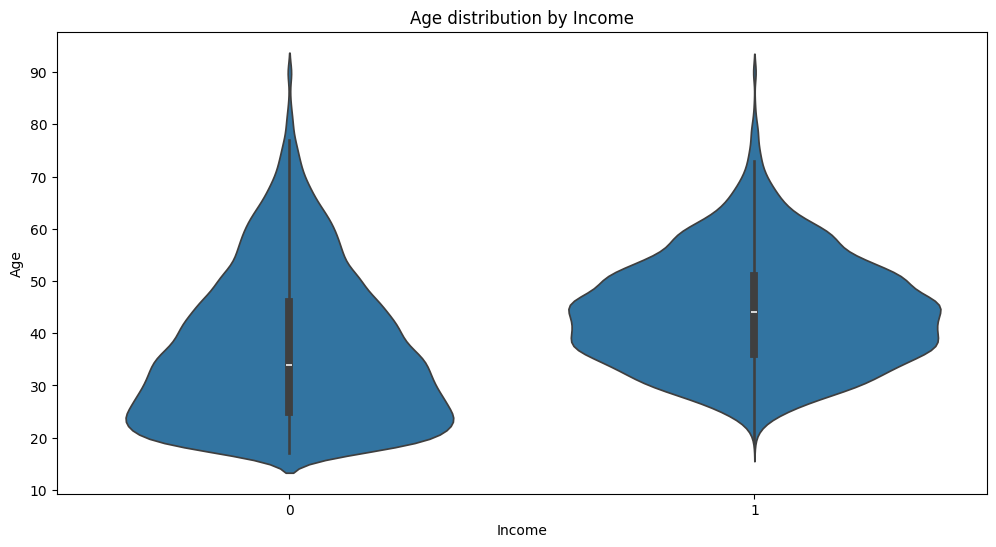

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='income', y='age', data=df)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Age distribution by Income")
plt.show()

# افراد بین حدودا 20 تا 35 سال درآمد کمتر دارند چون تازه کار هستند و افراد با درآمد بالا بین 35 تا 50 سال سن دارند
# پس می توان نتیجه گرفت که سن با درآمد رابطه مستقیم دارد

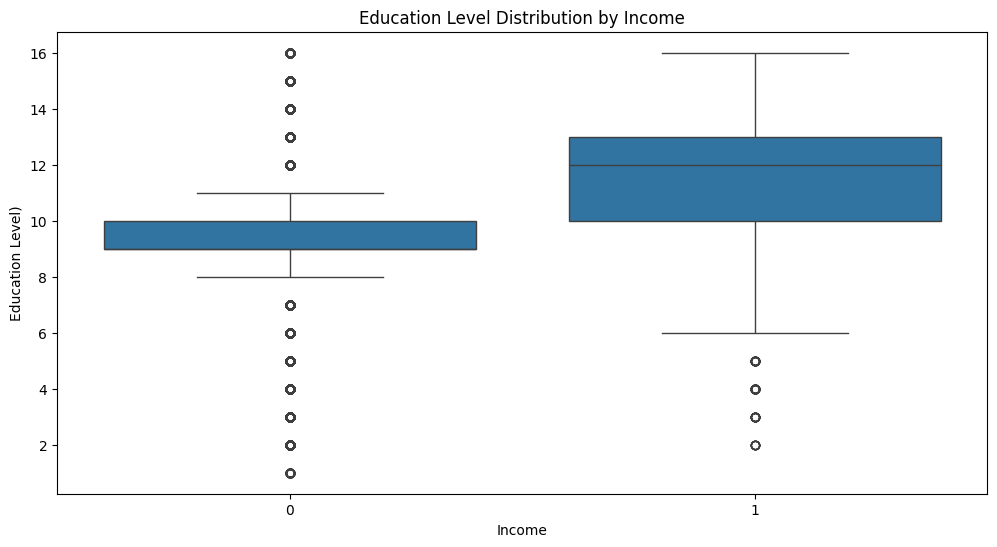

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='education-num', data=df)
plt.xlabel("Income")
plt.ylabel("Education Level)")
plt.title("Education Level Distribution by Income")
plt.show()
# افراد با درآمد کمتر معمولا تحصیلات شون تا دیپلم هست ، ولی افراد با درآمد بالا، معمولا حداقل دارای مدرک کالج یا لیسانس هستند. پس می‌ تونیم نتیجه بگیریم که هرچه سطح تحصیلات بالاتر باشه احتمال داشتن درآمد بالا بیشتر است  .

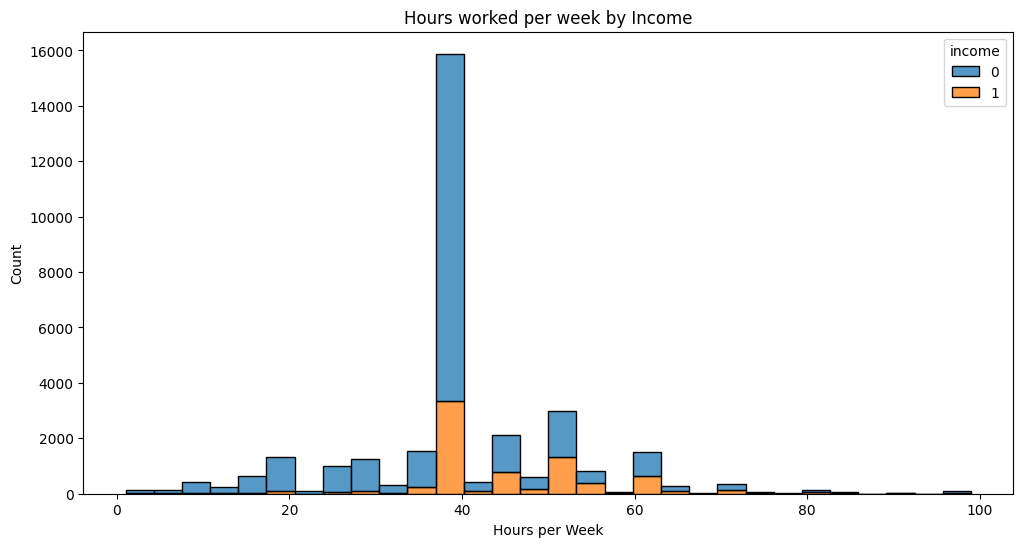

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='hours-per-week', hue='income', multiple='stack', bins=30)
plt.xlabel("Hours per Week")
plt.title("Hours worked per week by Income")
plt.show()
#افرادی که ساعات کاری هفتگی بیشتری دارند، درآمد بالاتری کسب می‌کنند. بنابراین، ساعات کاری می‌تواند یکی از عوامل تأثیرگذار بر درآمد باشد.


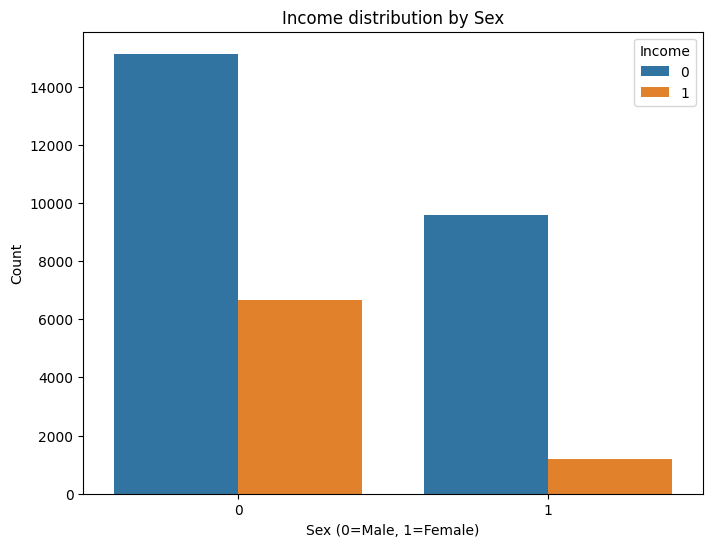

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='income', data=df)
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Count")
plt.title("Income distribution by Sex")
plt.legend(title="Income")
plt.show()
# مردان نسبت به زنان درآمد بالاتری دارند

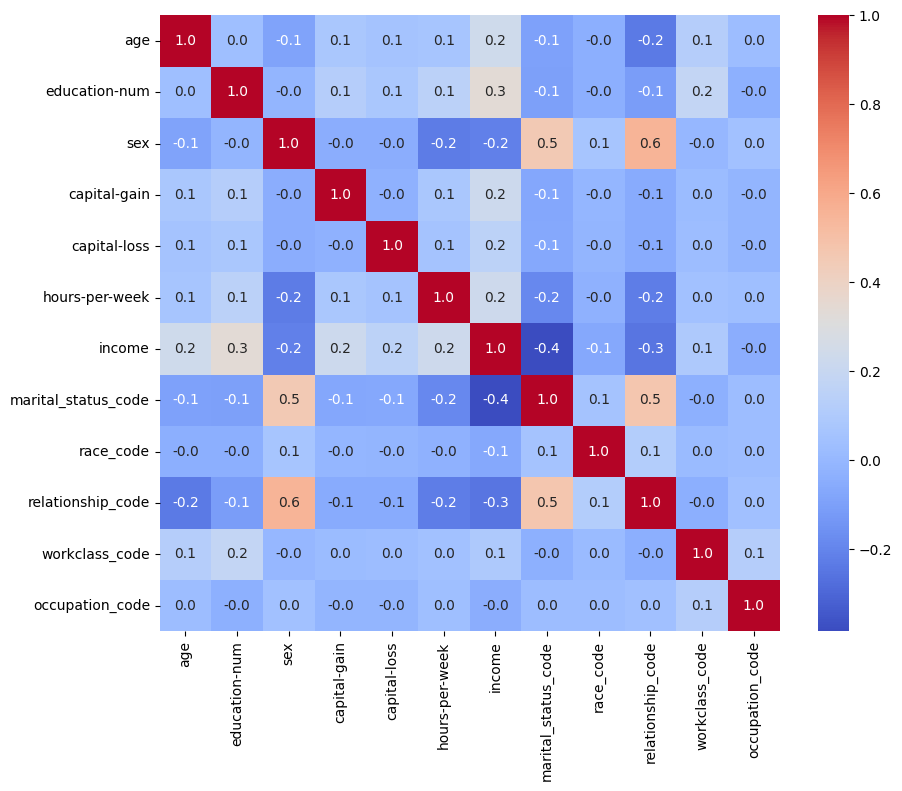

In [46]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['number']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".1f")
plt.show()
# وضعیت تاهل و رابطه خانوادگی نشان می‌دهد که می‌ تواند روی درآمد تاثیر بگذارد


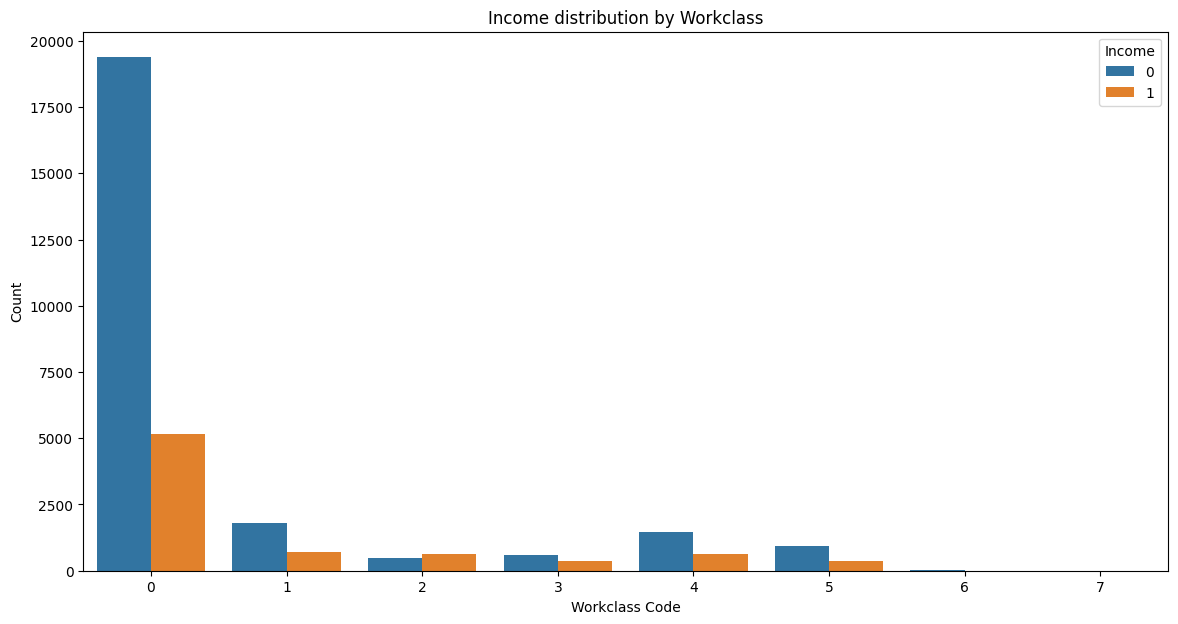

In [47]:
plt.figure(figsize=(14, 7))
sns.countplot(x='workclass_code', hue='income', data=df)
plt.xlabel("Workclass Code")
plt.ylabel("Count")
plt.title("Income distribution by Workclass")
plt.legend(title="Income")
plt.show()
# بیشترین تعداد افراد در دسته شغلی Private قرار دارند که هم افراد با درآمد کم و بالا به این گروه تعلق دارند.
# با توجه به دسته‌های شغلی  Self-emp-inc, Self-emp-not-inc می توان نتیجه گرفت که افراد خود اشتغال درآمد بالاتری دارند
# افرادی که خوداشتغال هستند، احتمال بیشتری برای داشتن درآمد بالاتر دارند، در حالی که برخی شغل های دولتی، بیشتر افرادشان درآمد پایین‌تری دارند.

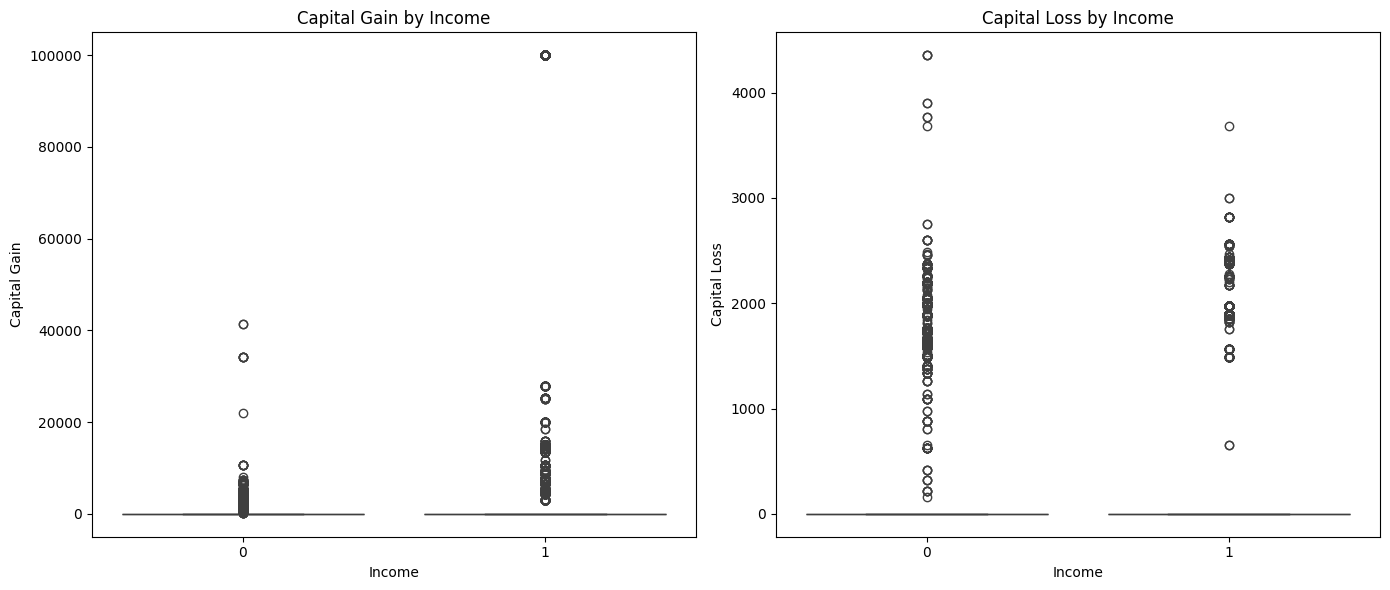

In [48]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital Gain by Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')

plt.subplot(1,2,2)
sns.boxplot(x='income', y='capital-loss', data=df)
plt.title('Capital Loss by Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')

plt.tight_layout()
plt.show()
# بیشتر افراد با درآمد بالاتر سود ناشی از سرمایه‌ گذاری را دارند، که این نشان‌دهنده وجود درآمدهای جانبی در این گروه است. در مقابل، افراد با درآمد کمتر اغلب به فکر سرمایه گذاری نیستند.
# ضرر سرمایه گذاری در هر دو گروه دیده می‌شود اما افراد با درآمد کمتر، برخی ضرر های بیشتری داشتند.
# .  پس سود ناشی از سرمایه‌ گذاری می‌تواند به عنوان یک منبع درآمد مکمل یا ثانویه علاوه بر درآمد فعلی باشد

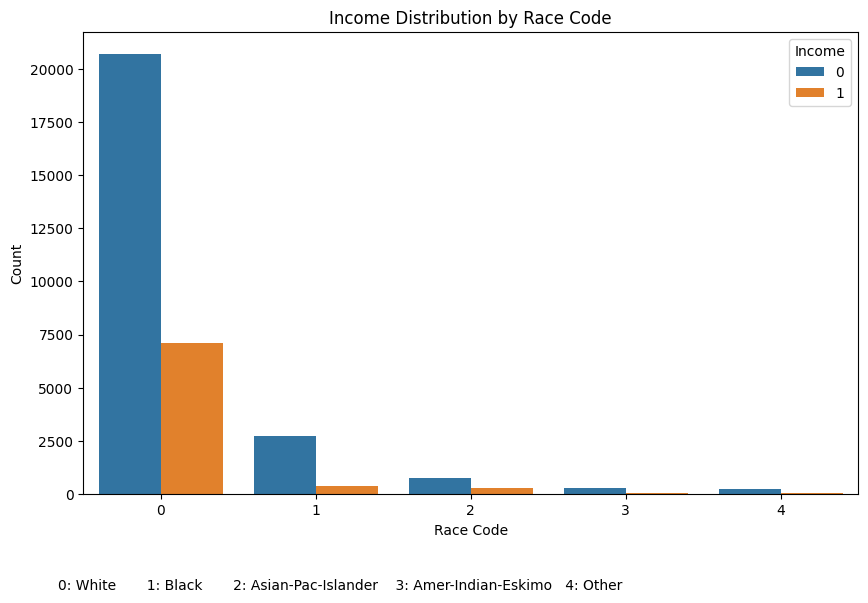

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x='race_code', hue='income', data=df)
plt.title('Income Distribution by Race Code')
plt.xlabel('Race Code')
plt.ylabel('Count')
plt.legend(title='Income')

race_labels = (
    "0: White       1: Black       2: Asian-Pac-Islander    3: Amer-Indian-Eskimo   4: Other"
)
plt.figtext(0.1, -0.05, race_labels, wrap=True, horizontalalignment='left', fontsize=10)

plt.show()

# افراد با درآمد بالا بیشتر نژاد سفید پوست و سیاه پوست هستند پس نژاد می تواند بر درآمد تاثیر بگذارد

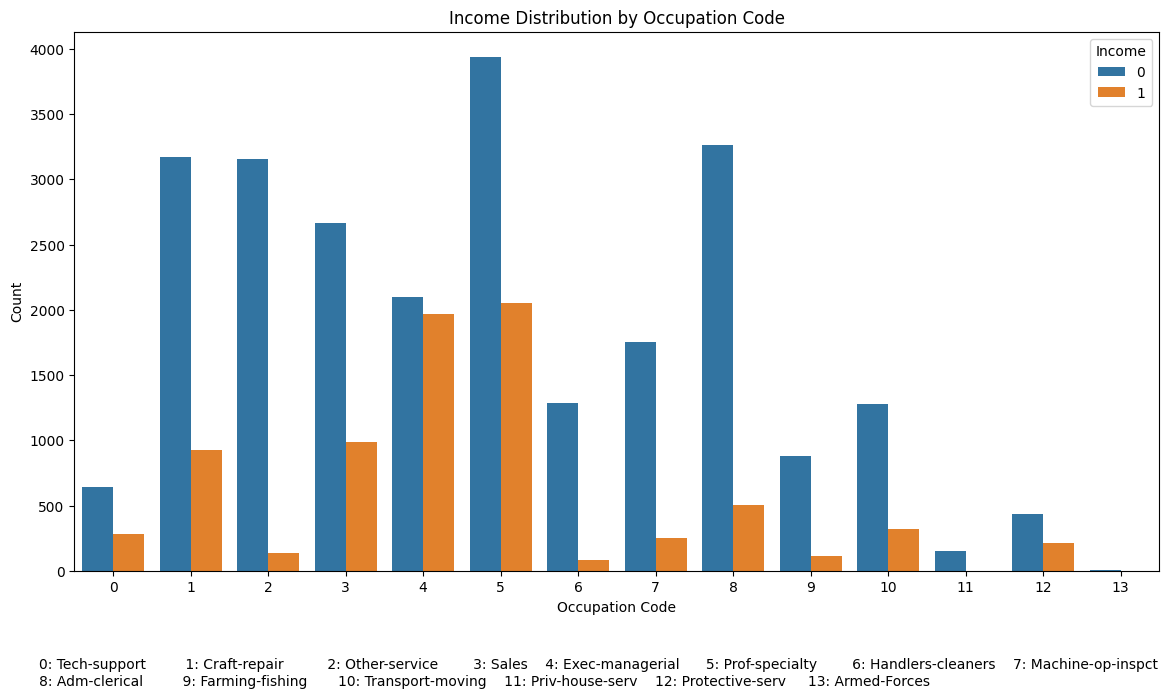

In [63]:
plt.figure(figsize=(14,7))
sns.countplot(x='occupation_code', hue='income', data=df)
plt.title('Income Distribution by Occupation Code')
plt.xlabel('Occupation Code')
plt.ylabel('Count')
plt.legend(title='Income')
occupation_labels = (
    "0: Tech-support         1: Craft-repair          2: Other-service        3: Sales    4: Exec-managerial      5: Prof-specialty        6: Handlers-cleaners    7: Machine-op-inspct\n"
    "8: Adm-clerical         9: Farming-fishing       10: Transport-moving    11: Priv-house-serv    12: Protective-serv     13: Armed-Forces"
)


plt.figtext(0.1, -0.05, occupation_labels, wrap=True, horizontalalignment='left', fontsize=10)
plt.subplots_adjust()

plt.show()
# افرادی که مشاغل مدیریتی و تخصصی دارند، بیشتر درآمد دارند.
# . در مقابل، افرادی که در مشاغل خدماتی  کار می‌کنند، عمدتاً درآمد پایین‌تر دارند
# پس می‌توان نتیجه گرفت که نوع شغل به ‌طور قابل توجهی روی سطح درآمد تاثیرگذار است و مشاغل تخصصی و مدیریتی درآمد بیشتری نسبت به مشاغل خدماتی و فنی دارند.

## Data Analysis(multi conditions)

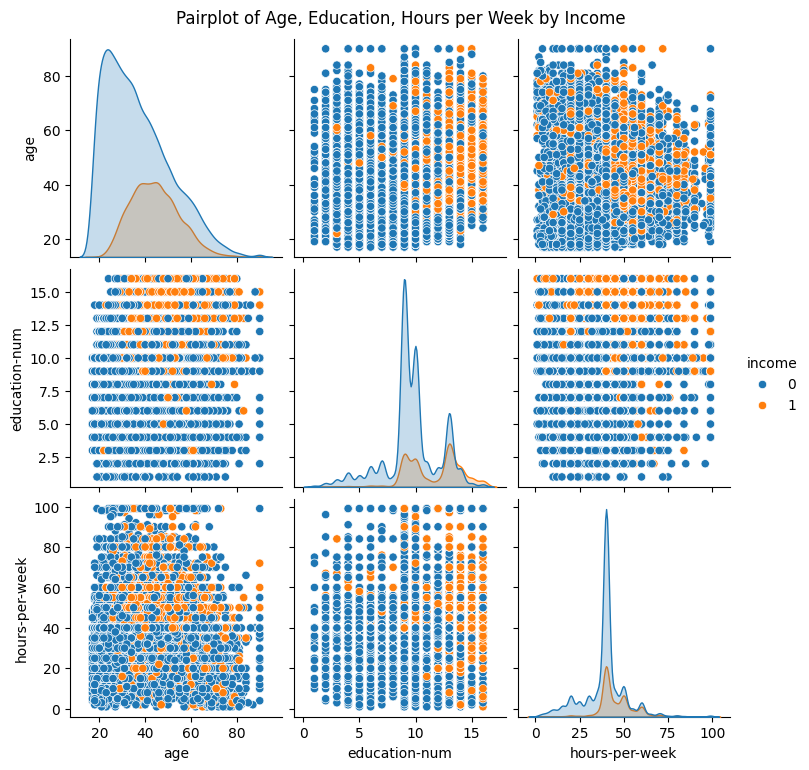

In [51]:
sns.pairplot(df, vars=['age', 'education-num', 'hours-per-week'], hue='income', height=2.5, diag_kind='kde')
plt.suptitle("Pairplot of Age, Education, Hours per Week by Income", y=1.02)
plt.show()
# این نمودار نشان می دهد که سن، تحصیلات و ساعات کاری با هم روی درآمد تأثیر می‌گذارند. افراد با درآمد بالاتر معمولاً سن بیشتر، تحصیلات بالاتر و ساعات کاری طولانی‌ تری دارند.

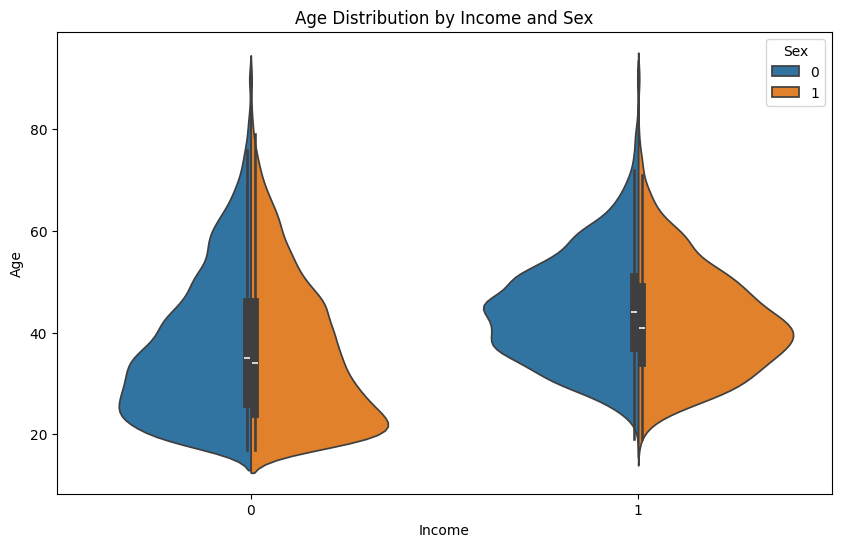

In [52]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='income', y='age', hue='sex', split=True)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Age Distribution by Income and Sex")
plt.legend(title="Sex", loc='upper right')
plt.show()
# سن و جنسیت هر دو بر درآمد تاثیر دارند. مردان معمولاً طیف سنی وسیع‌تری در گروه درآمد پایین دارند، ولی در درآمد بالا تفاوت جنسیتی کمتر است.

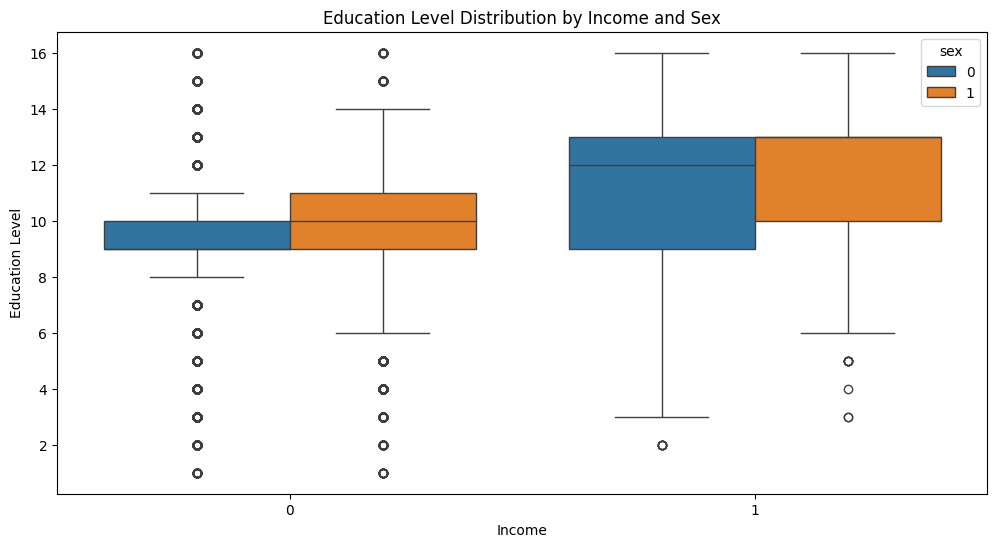

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='income', y='education-num', hue='sex')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.title('Education Level Distribution by Income and Sex')
plt.show()
# سطح تحصیلات با درآمد مرتبط است و همچنین، مردان با درآمد کمتر کمی تحصیلات بالاتری نسبت به زنان دارند، ولی افراد با  درآمد بالا تفاوت تحصیلی جنسیتی شان کم است

**Conclusion totally:**

تحصیلات، سن، ساعات کاری، جنسیت، وضعیت خانوادگی و نوع شغل عوامل اصلی تعیین‌کننده درآمد هستند. عواملی مثل نژاد و درآمدهای جانبی مثل سرمایه گذاری نقش مکمل دارند خیلی تاثیر گذار نیتسند.

# **Focus on Richest people Section**

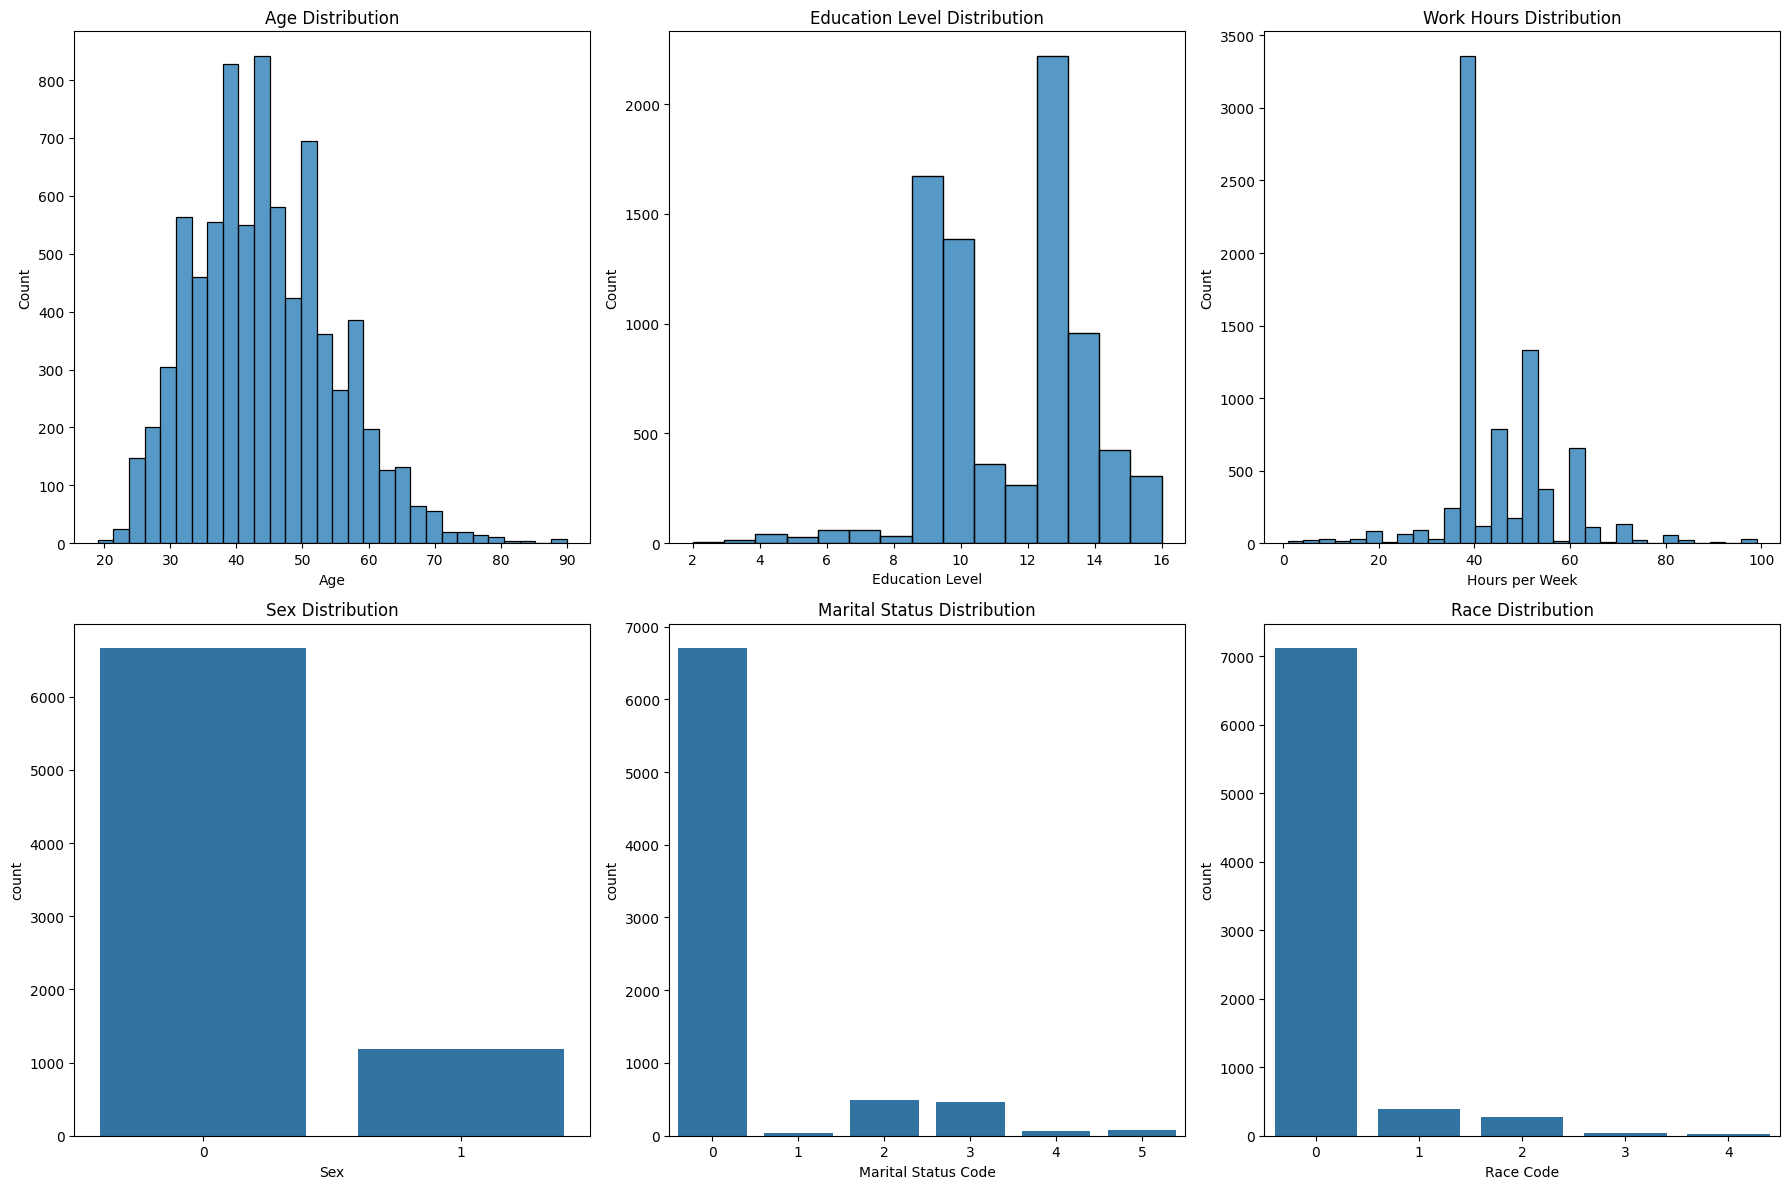

In [54]:
df_high_income = df[df["income"] == 1]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df_high_income["age"], bins=30, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")
axes[0,0].set_xlabel("Age")

sns.histplot(df_high_income["education-num"], bins=15, ax=axes[0,1])
axes[0,1].set_title("Education Level Distribution")
axes[0,1].set_xlabel("Education Level")

sns.histplot(df_high_income["hours-per-week"], bins=30, ax=axes[0,2])
axes[0,2].set_title("Work Hours Distribution")
axes[0,2].set_xlabel("Hours per Week")

sns.countplot(x="sex", data=df_high_income, ax=axes[1,0])
axes[1,0].set_title("Sex Distribution")
axes[1,0].set_xlabel("Sex")

sns.countplot(x="marital_status_code", data=df_high_income, ax=axes[1,1])
axes[1,1].set_title("Marital Status Distribution")
axes[1,1].set_xlabel("Marital Status Code")

sns.countplot(x="race_code", data=df_high_income, ax=axes[1,2])
axes[1,2].set_title("Race Distribution")
axes[1,2].set_xlabel("Race Code")

plt.tight_layout()
plt.show()
# افراد با درآمد بالا بیشتر مردان میانسال با تحصیلات کارشناسی یا بالاتر، متاهل و سفید پوست هستند که به طور معمول حدود ۴۰ ساعت یا بیشتر در هفته کار می‌کنند.